# Produce ECS distribution in standalone file

Theme Song: Mr Blue Sky<br>
Artist: Electric Light Orchestra<br>
Album: Out of the Blue<br>
Released: 1977

For Camilla's non-IPCC work :)

Post-constraint Geoffroy parameters requested by Kelly McCusker

In [1]:
import json

import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import scipy.stats as st

In [2]:
ecs = np.load('../data_input_large/fair-samples/ecs_unconstrained.npy')
accept_inds = np.loadtxt('../data_output_large/fair-samples/accept_inds.csv').astype(int)

In [3]:
ecs[accept_inds]

array([2.11534868, 2.13367855, 1.80091073, ..., 2.57175912, 2.75880555,
       2.38211563])

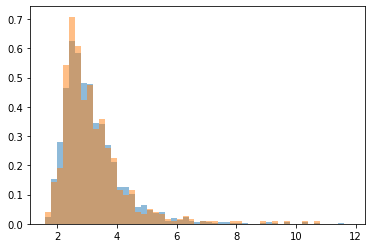

In [4]:
pl.hist(ecs[accept_inds], bins=np.arange(1.6,12.0,0.2), density=True, alpha=0.5);
pl.hist(ecs[accept_inds][:600], bins=np.arange(1.6,12.0,0.2), density=True, alpha=0.5);

In [5]:
np.savetxt('../data_output_large/fair-samples/ecs.csv', ecs[accept_inds], fmt='%f')

In [6]:
with open('../data_input/random_seeds.json', 'r') as filehandle:
    SEEDS = json.load(filehandle)

In [7]:
SAMPLES=1000000

In [8]:
with open("../data_input/tunings/cmip6_twolayer_tuning_params.json", "r") as read_file:
    params = json.load(read_file)
cmip6_models = list(params['q4x']['model_data']['EBM-epsilon'].keys())
cmip6_models
NMODELS = len(cmip6_models)

geoff_data = np.zeros((NMODELS, 6))
for im, model in enumerate(cmip6_models):
    geoff_data[im,0] = params['q4x']['model_data']['EBM-epsilon'][model]
    geoff_data[im,1] = params['lamg']['model_data']['EBM-epsilon'][model]
    geoff_data[im,2] = params['cmix']['model_data']['EBM-epsilon'][model]
    geoff_data[im,3] = params['cdeep']['model_data']['EBM-epsilon'][model]
    geoff_data[im,4] = params['gamma_2l']['model_data']['EBM-epsilon'][model]
    geoff_data[im,5] = params['eff']['model_data']['EBM-epsilon'][model]

geoff_df = pd.DataFrame(geoff_data, columns=['q4x','lamg','cmix','cdeep','gamma_2l','eff'], index=cmip6_models)
kde = st.gaussian_kde(geoff_df.T)
geoff_sample = kde.resample(size=int(SAMPLES*1.25), seed = SEEDS[15])

# remove unphysical combinations
geoff_sample[:,geoff_sample[0,:] <= 0] = np.nan
#geoff_sample[:,geoff_sample[1,:] >= -0.6] = np.nan
geoff_sample[1, :] = st.truncnorm.rvs(-2, 2, loc=-4/3, scale=0.5, size=int(SAMPLES*1.25), random_state=SEEDS[16])
geoff_sample[:,geoff_sample[2,:] <= 0] = np.nan
geoff_sample[:,geoff_sample[3,:] <= 0] = np.nan
geoff_sample[:,geoff_sample[4,:] <= 0] = np.nan
geoff_sample[:,geoff_sample[5,:] <= 0] = np.nan

mask = np.all(np.isnan(geoff_sample), axis=0)
geoff_sample = geoff_sample[:,~mask][:,:SAMPLES]
geoff_sample_df=pd.DataFrame(data=geoff_sample.T, columns=['q4x','lamg','cmix','cdeep','gamma_2l','eff']).loc[accept_inds]
geoff_sample_df.to_csv('../data_output/geoff_sample_constrained.csv')
geoff_sample_df

,q4x,lamg,cmix,cdeep,gamma_2l,eff
156,6.419499,-1.714643,8.810878,448.213437,0.440273,0.347264
358,8.646745,-1.817834,9.691545,103.494497,0.772469,1.585394
441,8.316302,-2.085561,5.696549,180.474488,0.821490,1.251474
636,7.889668,-0.796998,7.735094,89.445554,0.852359,1.535440
914,7.034846,-1.315331,8.992672,168.484833,0.709503,1.100228
...,...,...,...,...,...,...
996792,7.585270,-1.281183,8.745431,62.417455,0.755601,1.668154
996846,7.574501,-1.881943,9.089493,452.306881,0.565309,0.532951
998289,7.528928,-1.436389,7.878012,109.737561,0.522615,1.350649
998908,8.727801,-1.409111,9.221984,128.496448,0.521846,1.581632
